## Predicting flight ticket prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
#from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVR

In [2]:
#reading the train dataset
flight_train = pd.read_excel('Data_Train.xlsx')

In [3]:
#reading the test dataset
flight_test = pd.read_excel('Test_set.xlsx')

In [4]:
flight_train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
flight_train.shape,flight_test.shape

((10683, 11), (2671, 10))

In [7]:
flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
#checking the column types
flight_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
#checking the null values in a train dataset
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#checking the null values in a test dataset
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [11]:
#flight_train = flight_train.dropna()
flight_train[flight_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
flight_train['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [13]:
flight_train['Total_Stops'].mode()

0    1 stop
dtype: object

In [14]:
#inserting the most repeated route column value in null valued row
flight_train.loc[9039,'Route']='DEL → BOM → COK'
flight_train.loc[9039,'Total_Stops']='1 stop'

In [15]:
flight_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

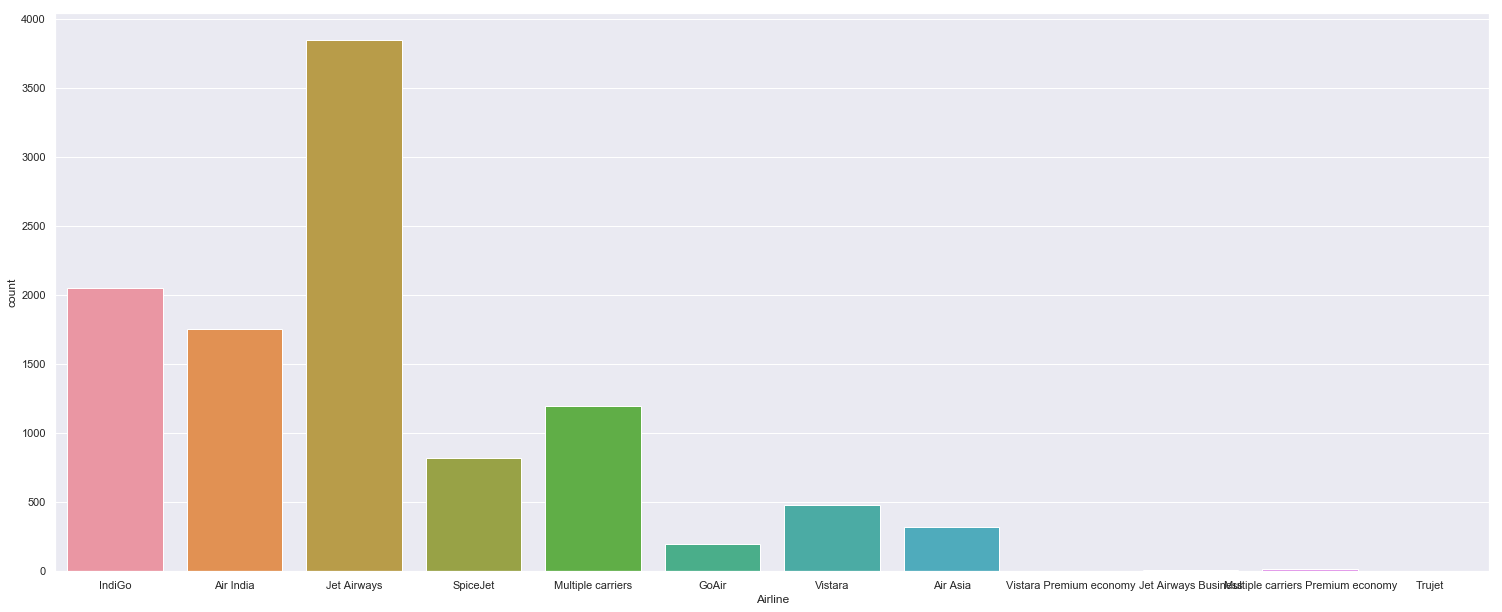

In [16]:
#Analysis of the various airlines 
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(flight_train['Airline'])

In [17]:
flight_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [18]:
pd.crosstab(flight_train['Source'],flight_train['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4537,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


#### As you can see that more number of flights is between delhi to cochi. So this may be the busiest route 

In [19]:
#row of the entire dataset where the price is maximum
flight_train.loc[flight_train['Price'].idxmax()]

Airline            Jet Airways Business
Date_of_Journey              01/03/2019
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
Name: 2924, dtype: object

In [20]:
#row of the entire dataset where the price is miniimum
flight_train.loc[flight_train['Price'].idxmin()]

Airline                SpiceJet
Date_of_Journey      21/03/2019
Source                   Mumbai
Destination           Hyderabad
Route                 BOM → HYD
Dep_Time                  22:45
Arrival_Time       00:10 22 Mar
Duration                 1h 25m
Total_Stops            non-stop
Additional_Info         No info
Price                      1759
Name: 4066, dtype: object

In [21]:
flight_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [22]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### most of the people are travelling in the month of june

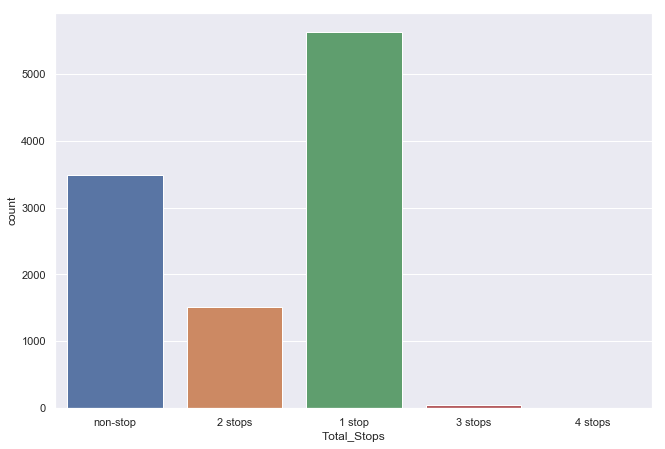

In [23]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.countplot(flight_train['Total_Stops'])
#there are more flights which have 1 stops

In [24]:
#stats of airlines with total stops
pd.crosstab(flight_train['Airline'],flight_train['Total_Stops'])

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop
Airline,,,,,
Air Asia,129,9,0,0,181
Air India,541,756,37,1,417
GoAir,102,0,0,0,92
IndiGo,793,19,0,0,1241
Jet Airways,2535,691,0,0,623
Jet Airways Business,4,2,0,0,0
Multiple carriers,1145,43,8,0,0
Multiple carriers Premium economy,13,0,0,0,0
SpiceJet,148,0,0,0,670


### Feature engineering

In [25]:
#extracting the month from the flight date
flight_train['Date_of_Journey'] = pd.to_datetime(flight_train['Date_of_Journey'])
flight_train['Month_of_Journey'] = flight_train['Date_of_Journey'].dt.month
flight_train['Day_of_Journey'] = flight_train['Date_of_Journey'].dt.day

In [26]:
flight_train['Month_of_Journey'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month_of_Journey, dtype: int64

In [27]:
#extracting the month from the flight date
flight_test['Date_of_Journey'] = pd.to_datetime(flight_test['Date_of_Journey'])
flight_test['Month_of_Journey'] = flight_test['Date_of_Journey'].dt.month
flight_test['Day_of_Journey'] = flight_test['Date_of_Journey'].dt.day

In [28]:
flight_train.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Month_of_Journey             int64
Day_of_Journey               int64
dtype: object

In [29]:
#preproceesing the duration
duration = list(flight_train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_train['Duration_hours'] = dur_hours
flight_train['Duration_minutes'] =dur_minutes


In [30]:
#for test dataset
duration = list(flight_test['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_test['Duration_hours'] = dur_hours
flight_test['Duration_minutes'] =dur_minutes


In [31]:
#droping the duration column in train dataset
flight_train = flight_train.drop(labels='Duration',axis=1)

In [32]:
#droping the duration column in test dataset
flight_test = flight_test.drop(labels='Duration',axis=1)

In [33]:
#featuring the departure_time and arrival_time
flight_train['Dep_Time'] = pd.to_datetime(flight_train['Dep_Time'])
flight_train['Arrival_Time'] = pd.to_datetime(flight_train['Arrival_Time'])
flight_train['Dep_Time_hours'] = flight_train['Dep_Time'].dt.hour
flight_train['Dep_Time_minutes'] = flight_train['Dep_Time'].dt.minute
flight_train['Arr_Time_hours'] = flight_train['Arrival_Time'].dt.hour
flight_train['Arr_Time_minutes'] = flight_train['Arrival_Time'].dt.minute

In [34]:
#featuring the departure_time and arrival_time
flight_test['Dep_Time'] = pd.to_datetime(flight_test['Dep_Time'])
flight_test['Arrival_Time'] = pd.to_datetime(flight_test['Arrival_Time'])
flight_test['Dep_Time_hours'] = flight_test['Dep_Time'].dt.hour
flight_test['Dep_Time_minutes'] = flight_test['Dep_Time'].dt.minute
flight_test['Arr_Time_hours'] = flight_test['Arrival_Time'].dt.hour
flight_test['Arr_Time_minutes'] = flight_test['Arrival_Time'].dt.minute

In [35]:
#dropping the orginal columns
flight_train = flight_train.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [36]:
flight_test = flight_test.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [37]:
#flight_train = flight_train.drop(labels='Route',axis=1)

In [38]:
flight_train['Price'].groupby(flight_train['Total_Stops']).mean()
#as you can see that 4 stops flights has more price in mean terms

Total_Stops
1 stop      10593.570032
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
non-stop     5024.900315
Name: Price, dtype: float64

In [39]:
#extracting the weekday name 
flight_train['Date_of_journey_weekname'] = flight_train['Date_of_Journey'].dt.weekday_name
flight_train['Is_weekend'] = np.where(flight_train['Date_of_journey_weekname'].isin(['Sunday','Saturday']),1,0)

In [40]:
#for test dataset
flight_test['Date_of_journey_weekname'] = flight_test['Date_of_Journey'].dt.weekday_name
flight_test['Is_weekend'] = np.where(flight_test['Date_of_journey_weekname'].isin(['Sunday','Saturday']),1,0)

In [41]:
#dropping the date of journey column in train data
flight_train = flight_train.drop(labels='Date_of_Journey',axis=1)

In [42]:
#dropping the date of journey column in test data
flight_test = flight_test.drop(labels='Date_of_Journey',axis=1)

In [43]:
flight_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [44]:
flight_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [45]:
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes,Date_of_journey_weekname,Is_weekend
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,2,50,22,20,1,10,Sunday,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15,Saturday,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,9,25,4,25,Friday,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,18,5,23,30,Thursday,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,16,50,21,35,Thursday,0


In [46]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes,Date_of_journey_weekname,Is_weekend
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25,Thursday,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20,Thursday,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,23,45,19,15,19,0,Tuesday,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,13,0,8,0,21,0,Tuesday,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,2,50,23,55,2,45,Monday,0


In [47]:
flight_train_orginal = flight_train.copy()

In [48]:
flight_test_orginal  = flight_test.copy()

## encoding

In [49]:
#using the label encoder
le1 = LabelEncoder()
le2 = LabelEncoder()

In [50]:
#dependent varaible
Y_Train = flight_train.iloc[:,6].values

In [51]:
#independent varaibles
X_Train = flight_train.iloc[:,flight_train.columns!='Price'].values

In [52]:
X_Train.shape

(10683, 16)

### encoding the categorical columns of the dataset 

In [53]:
X_Train[:,0] = le1.fit_transform(X_Train[:,0])

In [54]:
X_Train[:,1] = le1.fit_transform(X_Train[:,1])

In [55]:
X_Train[:,2] = le1.fit_transform(X_Train[:,2])

In [56]:
X_Train[:,3] = le1.fit_transform(X_Train[:,3])

In [57]:
X_Train[:,4] = le1.fit_transform(X_Train[:,4])

In [58]:
X_Train[:,5] = le1.fit_transform(X_Train[:,5])

In [59]:
X_Train[:,14] = le1.fit_transform(X_Train[:,14])

## encoding fot test data

In [60]:
X_Test = flight_test.iloc[:,:].values

In [61]:
X_Test[:,0] = le2.fit_transform(X_Test[:,0])

In [62]:
X_Test[:,1] = le2.fit_transform(X_Test[:,1])

In [63]:
X_Test[:,2] = le2.fit_transform(X_Test[:,2])

In [64]:
X_Test[:,3] = le2.fit_transform(X_Test[:,3])

In [65]:
X_Test[:,4] = le2.fit_transform(X_Test[:,4])

In [66]:
X_Test[:,5] = le2.fit_transform(X_Test[:,5])

In [67]:
X_Test[:,14] =  le2.fit_transform(X_Test[:,14])

In [68]:
pd.DataFrame(X_Test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4,2,1,76,0,5,6,6,10,55,17,30,4,25,4,0
1,3,3,0,65,0,5,12,5,4,0,6,20,10,20,4,0
2,4,2,1,76,0,3,5,21,23,45,19,15,19,0,5,0
3,6,2,1,76,0,5,5,21,13,0,8,0,21,0,5,0
4,0,0,2,16,4,5,6,24,2,50,23,55,2,45,1,0


## Scaling using standard scaler

In [69]:
sc = StandardScaler()

In [70]:
X_Train = sc.fit_transform(X_Train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [71]:
X_Test = sc.transform(X_Test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [72]:
Y_Train = Y_Train.reshape((len(Y_Train)),1)

In [73]:
Y_Train = sc.fit_transform(Y_Train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [74]:
Y_Train = Y_Train.ravel()

In [75]:
pd.DataFrame(X_Train).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.410675,-1.658441,2.416665,-1.547183,1.407309,0.499892,-0.848503,1.285632,-0.970698,1.279008,1.654259,-0.235050,-1.800427,-0.890057,0.001459,1.927837
1,-1.260999,0.890052,-0.973826,0.249876,-0.253632,0.499892,-1.517993,-0.872652,-0.382117,-0.196388,-1.303095,1.363492,-0.050851,-0.587124,-0.485724,1.927837
2,0.014486,0.040555,-0.295728,1.175633,-0.253632,0.499892,1.159966,-0.759058,1.030476,-1.671784,-0.607247,0.031373,-1.363033,0.018744,-1.460091,-0.518716
3,-0.410675,0.890052,-0.973826,0.440473,-0.807278,0.499892,2.164201,-0.872652,-0.617549,-0.196388,0.958411,-1.034321,1.407129,0.321677,0.488643,-0.518716
4,-0.410675,-1.658441,2.416665,-1.247673,-0.807278,0.499892,-1.517993,-1.099840,-0.735265,0.983929,0.610487,1.363492,1.115533,0.624611,0.488643,-0.518716
5,1.715134,0.890052,-0.973826,-0.294688,1.407309,0.499892,0.155732,1.285632,-0.970698,-0.196388,-0.607247,-1.300745,-0.342447,0.018744,-0.972908,-0.518716
6,0.014486,-1.658441,2.416665,-1.901149,-0.807278,-1.970964,2.164201,-1.099840,0.559611,0.098691,0.958411,1.629915,-0.488245,0.018744,0.975826,-0.518716
7,0.014486,-1.658441,2.416665,-1.901149,-0.807278,0.499892,-1.517993,-1.099840,1.265908,-1.376705,-0.781209,-1.300745,-1.217235,-1.192991,0.488643,-0.518716
8,0.014486,-1.658441,2.416665,-1.901149,-0.807278,-1.970964,2.164201,-1.099840,1.736772,0.098691,-0.781209,1.629915,-0.488245,0.018744,0.975826,-0.518716
9,0.864810,0.040555,-0.295728,0.794439,-0.807278,0.499892,-0.179013,1.626414,-0.382117,1.279008,-0.259323,0.031373,0.823937,-0.587124,-0.972908,-0.518716


In [76]:
pd.DataFrame(Y_Train).head()

,0
0,-1.125548
1,-0.309048
2,1.039858
3,-0.622202
4,0.914076


### Using randm forest regression

In [77]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [78]:
rf_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [79]:
rf =RandomForestRegressor()

### using the grid search

In [80]:
best_rf_tree=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,n_jobs=-1,cv=3,scoring='neg_mean_squared_error')

In [81]:
best_rf_tree.fit(X_Train,Y_Train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [82]:
rf_predict =sc.inverse_transform( best_rf_tree.predict(X_Test))

In [83]:
rf_predict

array([10408.59300711,  5564.72      , 14129.24320555, ...,
       15467.64527778, 12202.86633333,  8483.30238185])

In [84]:
#to exporting into excel sheet
pd.DataFrame(np.around(rf_predict),columns=['Price']).to_excel('Output_grid.xlsx',index=False)

### normal random forest regression

In [85]:
rf = RandomForestRegressor()

In [86]:
rf.fit(X_Train,Y_Train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [87]:
rf_predict =sc.inverse_transform( rf.predict(X_Test))

In [88]:
pd.DataFrame(rf_predict).head()

,0
0,11641.1
1,4715.4
2,13891.7
3,10065.6
4,3802.9


In [89]:
#rf_predict.to_csv('C:\Users\palva\Downloads\Analytics_projects_personal\Flight_price')

In [90]:
pd.DataFrame(rf_predict,columns=['Price']).to_excel('Output.xlsx',index=False)

### Using the svr  regressiom

In [91]:
svr = SVR(kernel='rbf')

In [92]:
svr.fit(X_Train,Y_Train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
svr_predict = svr.predict(X_Test)

In [95]:
svr_predict

array([ 0.49367703, -0.44072407,  0.2461375 , ...,  0.69761429,
        0.08421755,  0.41133825])

In [96]:
svr_predict_orginal = sc.inverse_transform(svr_predict)

In [97]:
pd.DataFrame(svr_predict_orginal).head()

,0
0,11363.479688
1,7054.822248
2,10222.039419
3,10229.414612
4,4337.271332


In [98]:
pd.DataFrame(svr_predict_orginal,columns=['Price']).to_excel('Output1_svr.xlsx',index=False)

### using XG bOOST

In [99]:
import xgboost
from xgboost.sklearn import XGBClassifier,XGBRegressor

In [100]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
min_child_width = [i for i in range(1,6,2)]
gamma = [i/10.0 for i in range(0,5)]
subsample = [i/10.0 for i in range(6,10)]
colsample_bytree=[i/10.0 for i in range(6,10)]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]
learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [101]:
random_grid = {'n_estimators': n_estimators,
               
              'min_child_weight':min_child_width,
              'gamma':gamma,
               'subsample':subsample,
               'colsample_bytree':colsample_bytree,
               'reg_alpha':reg_alpha,
               'learning_rate': learning_rate
              }

In [102]:
XG = XGBRegressor()

In [103]:
XG_random = RandomizedSearchCV(estimator=XG,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [104]:
XG_random.fit(X_Train,Y_Train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\s

[14:03:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'min_child_weight': [1, 3, 5], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
          pre_dispatch='2*n_jobs', random_state=

In [105]:
xg_predict = XG_random.predict(X_Test)

In [106]:
xg_predict_orginal = sc.inverse_transform(xg_predict)

In [107]:
xg_predict_orginal

array([10279.619 ,  2153.8235, 21099.115 , ..., 13574.18  ,  8685.317 ,
        4950.4565], dtype=float32)

In [108]:
XG_random.best_params_

{'subsample': 0.9,
 'reg_alpha': 1e-05,
 'n_estimators': 1000,
 'min_child_weight': 1,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.6}

In [109]:
XG_random.best_score_

0.8862998362765063